In [ ]:
"""
About the test 

-In the context of randomness testing, we're looking for the presence or absence of dominant frequencies.
-The DFT transforms a sequence from the time domain (the original sequence) to the frequency domain (a representation of the frequencies present).
-If a sequence is truly random, its frequency spectrum should be relatively flat, with no significant peaks at specific frequencies.

UNDRESTANDING THE OUTPUT: 

-Calculate the DFT: You'll feed your sequence into the DFT function, and it will give you the frequency spectrum.
-output np.fft.fft() is a numpy array of complex numbers
-symmetry: the second half is the complex conjugate of the first half. this means we usually only need to analyze the frist half

INTERPRETATION

-magnitude: the magnitude of each complex number represent the strength or amplitude of the corresponding freq. using np.abs()

Understanding the DC Component ZERO FREQUENCY: (why so large?)


-Non-Zero Average: In most real-world datasets, the average value is not zero. If your data has a bias or a constant offset, this will
manifest as a large DC component.

-Summation: The DFT essentially decomposes your signal into a sum of sine and cosine waves of different frequencies.
The 0-frequency component represents the sum of all the data points in your sequence.

-Average Value: When you calculate the DFT, the magnitude of the 0-frequency component is proportional to the sum of 
all the data points. If you divide this sum by the number of data points, you get the average value of your sequence.
and this correlation is usually much smaller than the sum of all input data points.

-No Cancellation: Unlike other frequency components where positive and negative parts of the waves can cancel each other out, the 0-frequency 
component doesn't have any oscillations. It's just a constant value, and thus, all values in the input data contribute to its magnitude without cancellation.


"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [1]:
data=r"/Users/macbookpro/Documents/RNG_testing/df_Small.csv"

In [3]:
df=pd.read_csv(data)
df=df.iloc[:1000]

## Dice

In [4]:
df_Dice=df[["dice"]]

In [5]:
#Seprating columns
df_Dice.loc[:,'Die1'] = df_Dice['dice'].apply(lambda x: x[0])
df_Dice.loc[:,'Die2'] = df_Dice['dice'].apply(lambda x: x[2])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [6]:
#DFT_Test
sequence= df_Dice["Die1"].to_numpy().astype(int)
N=len(sequence)
dft_result=np.fft.fft(sequence)
magnitudes=np.abs(dft_result)
half_magnitudes= magnitudes[:N// 2]
normalize_magnitudes=half_magnitudes / np.max(half_magnitudes)
frequencies= np.arange(N//2)

In [7]:
sum(sequence)

3571

In [8]:
magnitudes[0]

3571.0

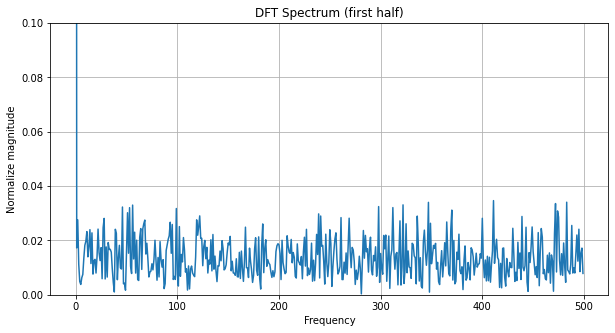

In [9]:
plt.figure(figsize=(10,5))
plt.plot(frequencies,normalize_magnitudes)
plt.title("DFT Spectrum (first half)")
plt.xlabel("Frequency")
plt.ylabel("Normalize magnitude")
plt.ylim( (0,0.1))
plt.grid(True)
plt.show()

In [ ]:
threshold=0.02
peaks=np.where(normalize_magnitudes > threshold)[0]
if len(peaks) >0:
    print("Significant peaks detected at frequencies:" , peaks)
else:
    print("Spectrum appears relatively Flat")

## Cards

In [10]:
df_card=df[["card"]]

In [11]:
#seperating cards
cards_column= df_card["card"].str.split("," , expand=True)
#Rename columns
cards_column.columns= [f"{i+1}" for i in range(cards_column.shape[1])]

In [12]:
def create_card_mapping():
    #Creates a mapping from card string to a number (1-52)

    ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K']
    suits = ['H', 'D', 'C', 'S']
    cards = [rank + suit for suit in suits for rank in ranks]
    return {card: i + 1 for i, card in enumerate(cards)}


#Mapping cards to 1-52
numeric_df= cards_column.apply(lambda x: [create_card_mapping()[card] for card in x])

In [13]:
shuffled_decks = []
for index, row in numeric_df.iterrows():
    shuffled_decks.append([int(x) for x in row.tolist()])

In [14]:
# DFT Test
#For each shuffled deck (sequence), compute the DFT 
def dft_analysis(decks):     
    """Performs DFT analysis on a list of shuffled decks."""
    num_decks = len(decks)
    deck_length = len(decks[0])
    all_magnitudes = []
    for sequence in decks:  # 'sequence' is a 1D array (list)
        dft_result = np.fft.fft(sequence)
        magnitudes = np.abs(dft_result)
        half_magnitudes = magnitudes[:deck_length // 2]
        normalized_magnitudes = half_magnitudes / np.max(half_magnitudes)
        all_magnitudes.append(normalized_magnitudes)
    return all_magnitudes


normalize_magnitudes=dft_analysis(shuffled_decks)

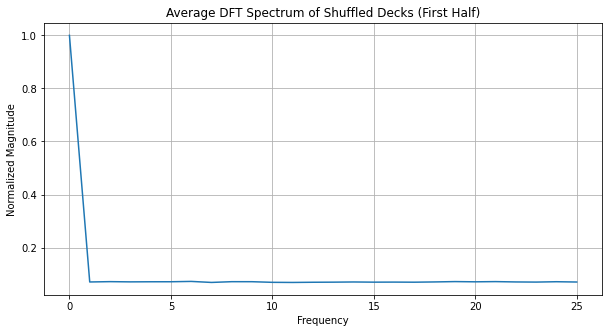

In [15]:
# Average Spectrum
average_magnitudes = np.mean(normalize_magnitudes, axis=0)
frequencies = np.arange(len(average_magnitudes))

# Plot the average spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies, average_magnitudes)
plt.title("Average DFT Spectrum of Shuffled Decks (First Half)")
plt.xlabel("Frequency")
plt.ylabel("Normalized Magnitude")
#plt.ylim((0,0.1))
plt.grid(True)
plt.show()

In [16]:
# Assess Flatness/Peaks
threshold = 0.2
peaks = np.where(average_magnitudes > threshold)[0]
if len(peaks) > 0:
    print("Significant peaks detected at frequencies:", peaks)
else:
    print("Spectrum appears relatively flat (no significant peaks).")

Significant peaks detected at frequencies: [0]


## Lotto

In [17]:
df_lotto=df[["lotoo"]]

In [18]:
#seprating values
df_lotto= df_lotto["lotoo"].str.split("," , expand=True)

In [19]:
lotto_list = []
for index, row in df_lotto.iterrows():
    lotto_list.append([int(x) for x in row.tolist()])

In [20]:
# DFT Test
def dft_analysis(Lst_Lotto):     #For each shuffled deck (sequence), compute the DFT 
    """Performs DFT analysis on a list of shuffled decks."""
    num_decks = len(Lst_Lotto)
    deck_length = len(Lst_Lotto[0])
    all_magnitudes = []
    for sequence in Lst_Lotto:  # 'sequence' is a 1D array (list)
        dft_result = np.fft.fft(sequence)
        magnitudes = np.abs(dft_result)
        #half_magnitudes = magnitudes[:deck_length // 2]
        normalized_magnitudes = magnitudes / np.max(magnitudes)
        all_magnitudes.append(normalized_magnitudes)
    return all_magnitudes


normalize_magnitudes=dft_analysis(lotto_list)

In [22]:
type(normalize_magnitudes)

list

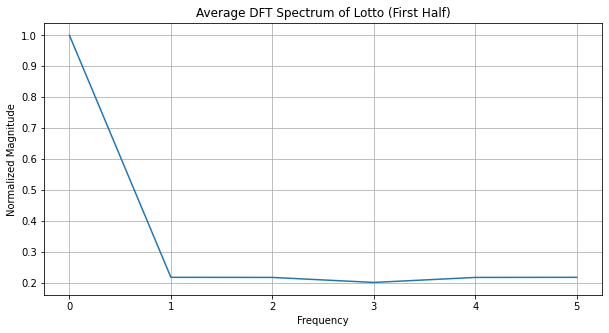

In [21]:
# Average Spectrum
average_magnitudes = np.mean(normalize_magnitudes, axis=0)
frequencies = np.arange(len(average_magnitudes))

# Plot the average spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies, average_magnitudes)
plt.title("Average DFT Spectrum of Lotto (First Half)")
plt.xlabel("Frequency")
plt.ylabel("Normalized Magnitude")
#plt.ylim((0,0.1))
plt.grid(True)
plt.show()